In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('playground-series-s3e16/train.csv')

Text(0.5, 1.0, 'Desity Plot of Weight Before Scaling')

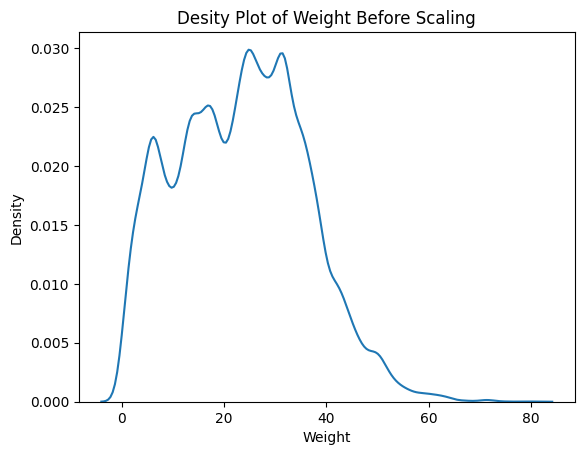

In [3]:
plot1 = sns.kdeplot(df['Weight'])
plot1.set_title('Desity Plot of Weight Before Scaling')

In [4]:
df.shape

(74051, 10)

In [5]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [7]:
df.dtypes

id                  int64
Sex                 int64
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

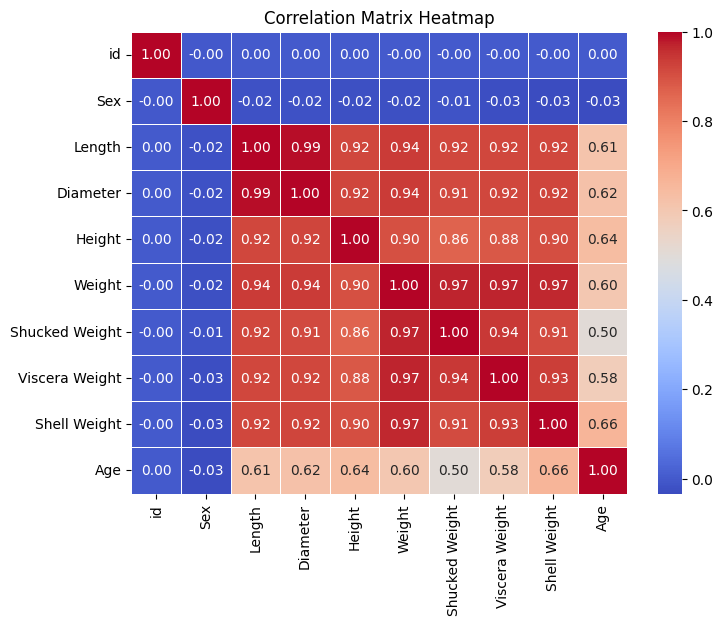

In [8]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
df = df.drop(['Sex'], axis=1)

In [10]:
x = df.drop(['Age'], axis=1)
y = df['Age']

In [11]:
cols = x.columns

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
print(X_test.shape[0])
print(X_train.shape[0])

14811
59240


-1.7127870132772164e-16

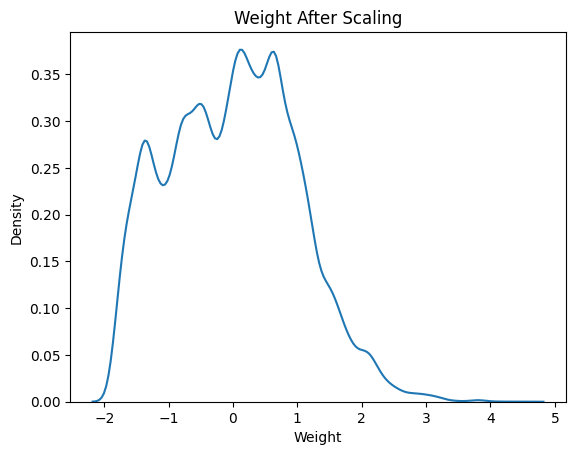

In [17]:
x_plot = pd.DataFrame(X_train, columns=cols)

plot2 = sns.kdeplot(x_plot['Weight'])
plot2.set_title('Weight After Scaling')
x_plot['Weight'].mean()

In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(128,64), activation='relu', max_iter=1000, random_state=42)

In [20]:
mlp_regressor.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

In [21]:
y_pred = mlp_regressor.predict(X_test)

In [22]:
import math

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

In [24]:
print('MSE ', mse)
print('R2 ' ,r2 )
print('RMSE ', rmse)

MSE  4.398852038194624
R2  0.5683831450648101
RMSE  2.0973440438312987


In [25]:
result = pd.DataFrame()
result['Actual'] = y_test
result['predicted'] = y_pred


In [26]:
result.to_excel('regression.xlsx')

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [28]:
model_base = Sequential()

2023-09-30 14:39:12.428951: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-09-30 14:39:12.428970: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-30 14:39:12.428974: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-30 14:39:12.429002: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-30 14:39:12.429017: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:
model_base.add(Input(shape = (X_train.shape[1], )))
model_base.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model_base.add(Dropout(0))
model_base.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.01)))
model_base.add(Dense(1, activation = 'linear'))

In [30]:
early_stopping = EarlyStopping(monitor='val_mean_absolute_error', patience=2, restore_best_weights=True)

In [31]:
model_base.compile(loss='mean_absolute_error',
                optimizer='adam',
                metrics=['mean_absolute_error'])

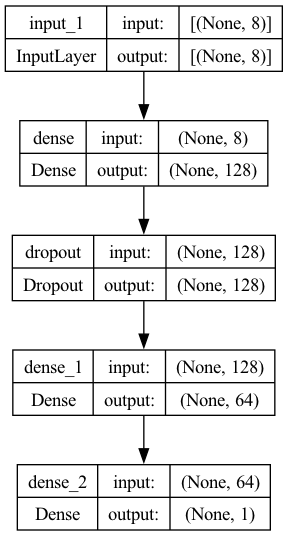

In [32]:
tf.keras.utils.plot_model(model_base, show_shapes=True)

In [33]:
history_base = model_base.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=8, callbacks = [early_stopping])

Epoch 1/8


2023-09-30 14:39:13.708714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1852/1852 [==============================] - ETA: 0s - loss: 4.3096 - mean_absolute_error: 2.1499

2023-09-30 14:41:42.298568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1852/1852 [==============================] - 363s 195ms/step - loss: 4.3096 - mean_absolute_error: 2.1499 - val_loss: 2.9814 - val_mean_absolute_error: 1.5189
Epoch 2/8
1852/1852 [==============================] - 182s 98ms/step - loss: 3.8441 - mean_absolute_error: 1.6177 - val_loss: 4.5771 - val_mean_absolute_error: 1.4857
Epoch 3/8
1852/1852 [==============================] - 181s 98ms/step - loss: 5.6692 - mean_absolute_error: 1.7276 - val_loss: 5.6394 - val_mean_absolute_error: 1.4851
Epoch 4/8
1852/1852 [==============================] - 183s 99ms/step - loss: 5.4279 - mean_absolute_error: 1.6148 - val_loss: 5.4658 - val_mean_absolute_error: 1.6438
Epoch 5/8
1852/1852 [==============================] - 182s 98ms/step - loss: 5.6702 - mean_absolute_error: 1.6059 - val_loss: 5.9639 - val_mean_absolute_error: 1.7226


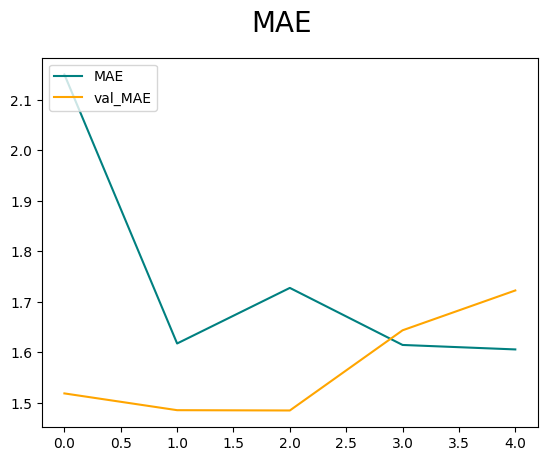

In [34]:
fig = plt.figure()
plt.plot(history_base.history['mean_absolute_error'], color='teal', label='MAE')
plt.plot(history_base.history['val_mean_absolute_error'], color='orange', label='val_MAE')
fig.suptitle('MAE', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
import pandas as pd
from pandas_profiling import ProfileReport

/opt/homebrew/Caskroom/miniforge/base/envs/cvup/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/Caskroom/miniforge/base/envs/cvup/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/cvup/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to Tr

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.4/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.4/u/import-error

In [ ]:
df = pd.read_csv('./playground-series-s3e16/train.csv')

In [ ]:
profile = ProfileReport(df, title = 'Crab age Dataset Report')

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]